   ### Data source:https://www.kaggle.com/datasets/carrie1/ecommerce-data
   ### Content:
"This is a transnational data set which contains all the transactions occurring between 01/12/2010 and 09/12/2011 for a UK-based and registered non-store online retail.The company mainly sells unique all-occasion gifts. Many customers of the company are wholesalers."

### Features:
 - InvoiceNo - The unique identifier of each customer invoice.
 - StockCode - The unique identifier of each item in stock.
 - Description - The item purchased by the customer.
 - Quantity - The number of each item purchased by the customer in one transaction.
 - InvoiceDate - Date of purchase.
 - UnitPrice - Price of one unit of each item.
 - CustomerID - The unique identifier given to each user.
 - Country - The country from where the purchase was made.

### Business Problem:
Our business is experiencing challenges in effectively engaging with a diverse customer base. While some customers are highly loyal and generate significant revenue, others show declining engagement or sporadic purchasing behavior. This lack of targeted customer interaction leads to missed opportunities for growth, inefficient allocation of marketing resources, and potential loss of customers to competitors.

### The key issues include:
  -  Limited understanding of different customer segments and their unique behaviors.
  -  Generalized marketing efforts that fail to resonate with specific customer needs.
  -  Ineffective resource allocation, resulting in a suboptimal return on investment (ROI).
  -  Difficulty identifying high-value customers for retention and low-value customers for reactivation.

### Objective:
The primary goal of this project is to leverage customer segmentation to enhance marketing effectiveness and drive business growth. By analyzing customer transaction data using the RFM (Recency, Frequency, Monetary) model, the project aims to group customers into distinct clusters based on their purchasing behaviors. These clusters will provide actionable insights to tailor marketing strategies, foster customer engagement, improve retention, and maximize revenue. Ultimately, the project seeks to enable data-driven decision-making, aligning business efforts with customer needs and preferences.

### Solution Steps:
Data Preprocessing:
   - Checked for missing and duplicated values.
   - Changed 'InvoiceDate' to datetime format
   - Created relevant features for analysis: Aggregated data to construct an RFM profile for each customer.
       - Recency: Days since the last purchase.
       - Frequency: Number of transactions made by a customer.
       - Monetary Value: Total purchase value per customer.
   - Removed outliers: Use boxplots for visualization and z-score to find outliers

Data Scaling: Standardized the RFM features using StandardScaler from Sklearn to normalize the data for clustering.

Elbow Method: Used the Elbow Method to determine the optimal number of clusters by plotting the within-cluster sum of squares (WCSS) for different cluster counts.

Building the K-Means Model:
    Implemented the K-Means clustering algorithm using Sklearn with the optimal number of clusters determined from the Elbow Method.

Silhouette Score Analysis: Evaluated the quality of clustering using the Silhouette Score metric to ensure well-separated and cohesive clusters.

Dimension Reduction: Using Principle Component Analysis. PCA reduces the data to two or three principal components while preserving as much variance as possible. Also,I used t-SNE which is another dimensionality reduction technique that can capture nonlinear relationships better than PCA.

Cluster Analysis: Assigned each customer to a cluster and analyzed the characteristics of each group based on their RFM metrics.



### Customer Segmentation and Reccomended Strategy: 
### Cluster 0: Emerging Customers
#### Profile:
   - Recency: 64 days (recent customers).
   - Frequency: Moderate frequency of ~15 purchases.
   - Monetary Value: Low average spend of ~247.
#### Recommended Strategy:
Objective: Increase engagement and spending to grow this segment into more valuable customers.
   - Actions:
     - Launch targeted engagement campaigns, such as discounts on their next purchase or personalized recommendations based on past purchases.
     - Use retargeting ads to remind these customers of products they’ve viewed or similar products.
     - Offer incentives for repeat purchases, such as "buy X, get Y" promotions or limited-time discounts.
     
### Cluster 1: VIP Customers
#### Profile:
   - Recency: 135 days (not very recent, but active).
   - Frequency: High frequency of ~43 purchases.
   - Monetary Value: High average spend of ~1202.
#### Recommended Strategy: 
Objective: Retain these high-value customers and strengthen their loyalty.
   - Actions: 
     - Develop a loyalty program to reward their continued patronage with exclusive perks (e.g., early access to new products, special discounts, or free shipping).
     - Host VIP-only events, such as sneak peeks or product launches.
     - Send personalized thank-you notes or gifts to show appreciation.
     - Offer referral bonuses to encourage them to bring in new customers from their network.

### Cluster 2: Frequent Buyers
#### Profile:
   - Recency: 187 days (somewhat recent).
   - Frequency: Very high frequency of ~75 purchases.
   - Monetary Value: Moderate average spend of ~ 443.
#### Recommended Strategy:
Objective: Increase the average spend of these frequent buyers.
   - Actions:
     - Bundle products or introduce bulk discounts to encourage larger purchases.
     - Use cross-selling and upselling strategies to introduce complementary or premium products.
     - Create limited-time offers on higher-value items to encourage them to explore other product categories.
     - Send dynamic emails showcasing personalized product bundles based on their frequent purchases.
        
### Cluster 3: Dormant Customers
#### Profile:
   - Recency: 280 days (least recent).
   - Frequency: Low frequency of ~18 purchases.
   - Monetary Value: Low average spend of ~289.
#### Recommended Strategy:
Objective: Reactivate these customers and reignite their interest in the brand.
   - Actions: 
     - Launch reactivation campaigns, such as personalized emails offering special discounts or highlighting new arrivals.
     -   Provide strong incentives like "We Miss You" offers or free shipping on their next purchase.
     -   Share customer success stories, testimonials, or user-generated content to rebuild trust and interest.
     -   Use a survey to understand why they’ve disengaged and address potential issues (e.g., pricing, product availability, etc.).

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('data.csv', encoding='unicode_escape')


In [3]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   StockCode    541909 non-null  object 
 2   Description  540455 non-null  object 
 3   Quantity     541909 non-null  int64  
 4   InvoiceDate  541909 non-null  object 
 5   UnitPrice    541909 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      541909 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB


In [5]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Quantity,541909.0,9.552250,218.081158,-80995.00,1.00,3.00,10.00,80995.0
UnitPrice,541909.0,4.611114,96.759853,-11062.06,1.25,2.08,4.13,38970.0
CustomerID,406829.0,15287.690570,1713.600303,12346.00,13953.00,15152.00,16791.00,18287.0


In [6]:
df.shape

(541909, 8)

In [7]:
df.isnull().sum()

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64

In [8]:
df.duplicated()

0         False
1         False
2         False
3         False
4         False
          ...  
541904    False
541905    False
541906    False
541907    False
541908    False
Length: 541909, dtype: bool

In [9]:
df.dtypes

InvoiceNo       object
StockCode       object
Description     object
Quantity         int64
InvoiceDate     object
UnitPrice      float64
CustomerID     float64
Country         object
dtype: object

### Data preprocessing

### RFM Components

 - Recency: Time since the customer's last purchase.
 -  Frequency: Number of purchases made by the customer.
 -   Monetary: Total monetary value of the customer's purchases.

### Recency: 
Identify when each customer last made a purchase. Rank each customer based on what time they last made a purchase and apply a recency score to them.(the most recent a purhase the higher the recency score)

In [10]:
# change 'InvoiceDate' to datetime format
df['Date']= pd.to_datetime(df['InvoiceDate'])

In [11]:
# want only recent dates
df['rank'] = df.sort_values(['CustomerID','Date']).groupby(['CustomerID'])['Date'].rank(method='min').astype(int)
df_rec = df[df['rank']==1]

In [12]:
# assign a recency score to 'CustomerID'
df_rec = df_rec.copy()  # Create a copy of the DataFrame

df_rec['recency'] = (df_rec['Date'] - pd.to_datetime(df_rec['Date'].min())).dt.days



In [13]:
df_rec.head()


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Date,rank,recency
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom,2010-12-01 08:26:00,1,0
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom,2010-12-01 08:26:00,1,0
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom,2010-12-01 08:26:00,1,0
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom,2010-12-01 08:26:00,1,0
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom,2010-12-01 08:26:00,1,0


In [14]:
df_rec.tail()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Date,rank,recency
541801,581578,22993,SET OF 4 PANTRY JELLY MOULDS,12,12/9/2011 12:16,1.25,12713.0,Germany,2011-12-09 12:16:00,1,373
541802,581578,22907,PACK OF 20 NAPKINS PANTRY DESIGN,12,12/9/2011 12:16,0.85,12713.0,Germany,2011-12-09 12:16:00,1,373
541803,581578,22908,PACK OF 20 NAPKINS RED APPLES,12,12/9/2011 12:16,0.85,12713.0,Germany,2011-12-09 12:16:00,1,373
541804,581578,23215,JINGLE BELL HEART ANTIQUE SILVER,12,12/9/2011 12:16,2.08,12713.0,Germany,2011-12-09 12:16:00,1,373
541805,581578,22736,RIBBON REEL MAKING SNOWMEN,10,12/9/2011 12:16,1.65,12713.0,Germany,2011-12-09 12:16:00,1,373


### Frequency:
Identify how many times a customer made purchases

In [15]:
# create a dataframe with frequency of purchases by 'CustomerID'
freq = df_rec.groupby('CustomerID')['Date'].count()
df_freq = pd.DataFrame(freq).reset_index() # <-- create a df with number of purchases by 'CustomerID'
df_freq.columns = ['CustomerID','frequency'] # <-- create 2 columns in this df

In [19]:
# Merge both df_rec and df_freq on 'CustomerID'
rec_freq = df_freq.merge(df_rec,on= 'CustomerID')

In [20]:
rec_freq.head()

,CustomerID,frequency,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,Country,Date,rank,recency
0,12346.0,1,541431,23166,MEDIUM CERAMIC TOP STORAGE JAR,74215,1/18/2011 10:01,1.04,United Kingdom,2011-01-18 10:01:00,1,48
1,12347.0,31,537626,85116,BLACK CANDELABRA T-LIGHT HOLDER,12,12/7/2010 14:57,2.10,Iceland,2010-12-07 14:57:00,1,6
2,12347.0,31,537626,22375,AIRLINE BAG VINTAGE JET SET BROWN,4,12/7/2010 14:57,4.25,Iceland,2010-12-07 14:57:00,1,6
3,12347.0,31,537626,71477,COLOUR GLASS. STAR T-LIGHT HOLDER,12,12/7/2010 14:57,3.25,Iceland,2010-12-07 14:57:00,1,6
4,12347.0,31,537626,22492,MINI PAINT SET VINTAGE,36,12/7/2010 14:57,0.65,Iceland,2010-12-07 14:57:00,1,6


 ### Monetary Value:
 Identify  how much money each customer has spent on the platform

In [21]:
df_rec['total'] =df_rec['Quantity'] * df['UnitPrice']
m = df_rec.groupby('CustomerID')['total'].sum()
m = pd.DataFrame(m).reset_index()
m.columns = ['CustomerID','monetary_value']

In [22]:
rfm = m.merge(rec_freq, on = 'CustomerID')

In [23]:
final_rfm = rfm[['CustomerID','recency','frequency','monetary_value']]

In [24]:
final_rfm.head()

,CustomerID,recency,frequency,monetary_value
0,12346.0,48,1,77183.60
1,12347.0,6,31,711.79
2,12347.0,6,31,711.79
3,12347.0,6,31,711.79
4,12347.0,6,31,711.79


In [25]:
final_rfm.shape

(100810, 4)

In [26]:
final_rfm.isnull().sum()

CustomerID        0
recency           0
frequency         0
monetary_value    0
dtype: int64

In [27]:
unique_customers = final_rfm['CustomerID'].nunique()
print(f"Number of unique CustomerIDs: {unique_customers}")


Number of unique CustomerIDs: 4372


### Find and remove outliers

recency: 


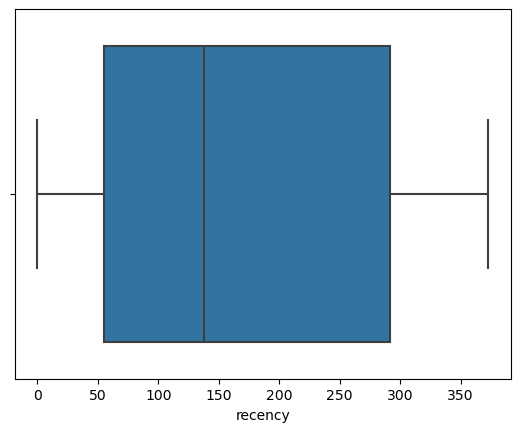

frequency: 


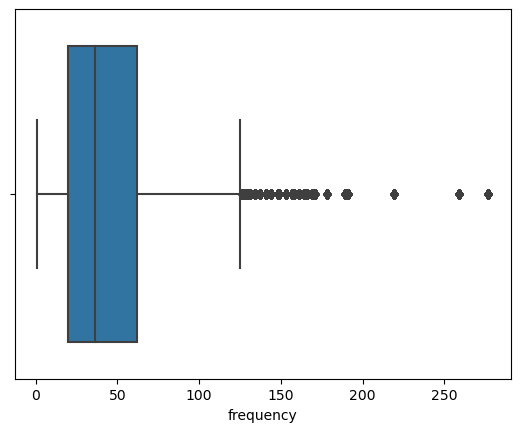

monetary_value: 


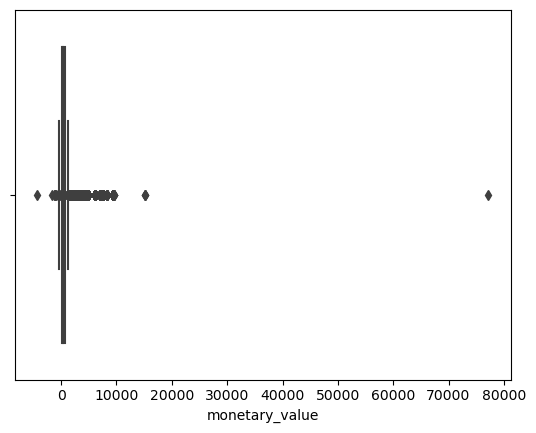

In [28]:
my_list = ['recency','frequency','monetary_value']
for i in my_list:
    print(str(i) +': ')
    ax = sns.boxplot(x =final_rfm[str(i)])
    plt.show()
    

In [29]:
# REMOVING OUTLIERS

from scipy import stats

# remove the customer id column
new_df = final_rfm[['recency','frequency','monetary_value']]

# get z_scores
z_scores = stats.zscore(new_df)
abs_z_scores = np.abs(z_scores)

# remove outliers: remove every data point with a Z-Score>=3
filtered_entries = (abs_z_scores < 3).all(axis=1)

new_df = new_df[filtered_entries]

In [30]:
new_df.head()

,recency,frequency,monetary_value
1,6,31,711.79
2,6,31,711.79
3,6,31,711.79
4,6,31,711.79
5,6,31,711.79


### Standardization using StandardScaler

In [31]:
from sklearn.preprocessing import StandardScaler

new_df=new_df.drop_duplicates()

col_names = ['recency', 'frequency', 'monetary_value']
features = new_df[col_names]
scaler = StandardScaler().fit(features.values)
features = scaler.transform(features.values)
scaled_features = pd.DataFrame(features, columns = col_names)

In [32]:
scaled_features.head()

,recency,frequency,monetary_value
0,-1.196757,0.388968,1.031898
1,-1.120651,-0.256852,1.557356
2,1.754467,2.326428,4.067659
3,-0.714752,-0.256852,-0.063636
4,-0.596365,-0.349112,-0.173657


### Build customer segmentation model - KMeans

Text(0, 0.5, 'Inertia')

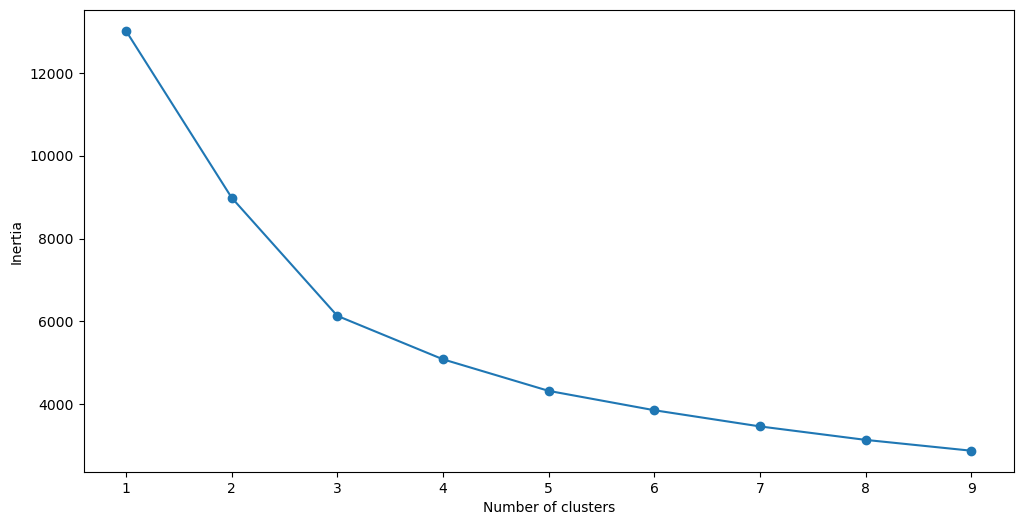

In [33]:
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.decomposition import PCA
from mpl_toolkits.mplot3d import Axes3D

SSE = []
for cluster in range(1,10):
    kmeans = KMeans(n_clusters = cluster, init='k-means++')
    kmeans.fit(scaled_features)
    SSE.append(kmeans.inertia_)
    
# converting the results into a dataframe and plotting them
frame = pd.DataFrame({'Cluster':range(1,10), 'SSE':SSE})
plt.figure(figsize=(12,6))
plt.plot(frame['Cluster'], frame['SSE'], marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')

In [40]:
#based on elbo score the optimal number of clusters is 4
kmeans = KMeans( n_clusters = 4, init='k-means++')
kmeans.fit(scaled_features)

KMeans(n_clusters=4)

The silhouette score measures how well-separated the clusters are and how compact the points within each cluster are.
  -  Range: The score ranges from -1 to 1:
      -  A score close to 1: Indicates well-separated, compact clusters.
      -  A score close to 0: Indicates overlapping clusters.
      - A negative score: Suggests that data points may be assigned to incorrect clusters.

In [38]:
print(silhouette_score(scaled_features, kmeans.labels_, metric='euclidean'))

0.40412898562495203


### Dimensionality Reduction (Using PCA)
PCA reduces the data to two or three principal components while preserving as much variance as possible.

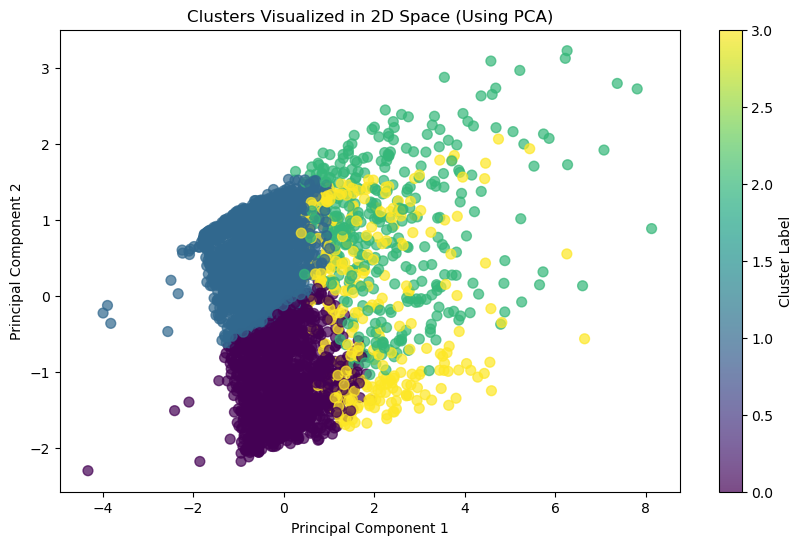

In [36]:
from sklearn.decomposition import PCA


# Perform PCA to reduce to 2 components
pca = PCA(n_components=2)
reduced_features = pca.fit_transform(scaled_features)

# Retrieve cluster labels
labels = kmeans.labels_

# Plot the clusters
plt.figure(figsize=(10, 6))
plt.scatter(reduced_features[:, 0], reduced_features[:, 1], c=labels, cmap='viridis', s=50, alpha=0.7)
plt.title('Clusters Visualized in 2D Space (Using PCA)')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.colorbar(label='Cluster Label')
plt.show()


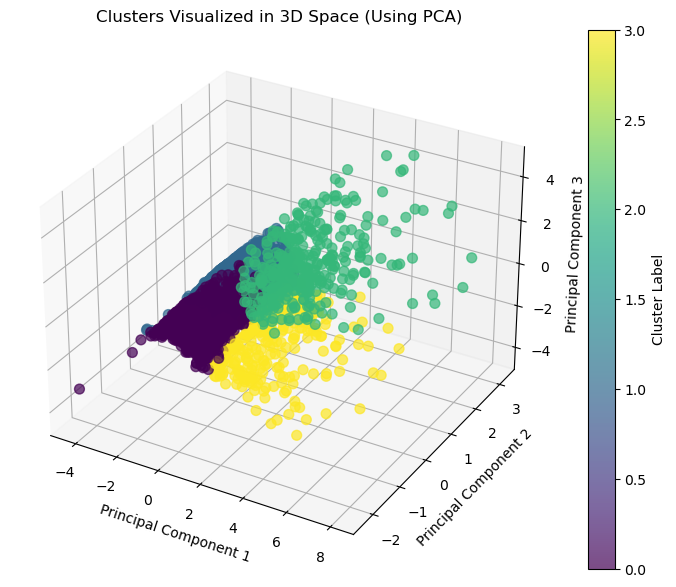

In [37]:
from mpl_toolkits.mplot3d import Axes3D

# Perform PCA to reduce to 3 components
pca_3d = PCA(n_components=3)
reduced_features_3d = pca_3d.fit_transform(scaled_features)

# Plot clusters in 3D
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')
sc = ax.scatter(reduced_features_3d[:, 0], reduced_features_3d[:, 1], reduced_features_3d[:, 2],
                c=labels, cmap='viridis', s=50, alpha=0.7)
ax.set_title('Clusters Visualized in 3D Space (Using PCA)')
ax.set_xlabel('Principal Component 1')
ax.set_ylabel('Principal Component 2')
ax.set_zlabel('Principal Component 3')
plt.colorbar(sc, label='Cluster Label')
plt.show()


###  Another method for dimension reduction: Use t-SNE for Nonlinear Dimensionality Reduction
t-SNE is another dimensionality reduction technique that can capture nonlinear relationships better than PCA.

C:\Users\zzyzz\Anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
C:\Users\zzyzz\Anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


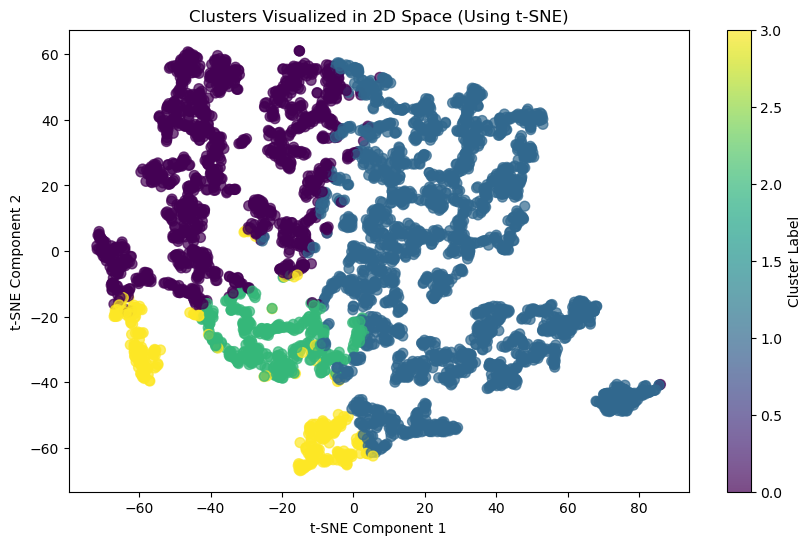

In [41]:
from sklearn.manifold import TSNE

# Perform t-SNE to reduce to 2 components
tsne = TSNE(n_components=2, random_state=42)
tsne_features = tsne.fit_transform(scaled_features)

# Plot the clusters
plt.figure(figsize=(10, 6))
plt.scatter(tsne_features[:, 0], tsne_features[:, 1], c=labels, cmap='viridis', s=50, alpha=0.7)
plt.title('Clusters Visualized in 2D Space (Using t-SNE)')
plt.xlabel('t-SNE Component 1')
plt.ylabel('t-SNE Component 2')
plt.colorbar(label='Cluster Label')
plt.show()


In [42]:
pred = kmeans.predict(scaled_features)
frame = pd.DataFrame(new_df)
frame['cluster'] = pred

# Each row in this new column contains the corresponding cluster label for 
# that data point, as predicted by the KMeans model

In [43]:
frame.head()

,recency,frequency,monetary_value,cluster
1,6,31,711.79,0
32,15,17,892.80,1
49,355,73,1757.55,1
122,63,17,334.40,0
139,77,15,296.50,0


In [45]:
# hows the average values of other features for each cluster
frame.groupby('cluster').mean()


,recency,frequency,monetary_value
cluster,,,
0,64.136463,14.597192,246.942326
1,135.329759,43.305630,1202.405767
2,187.488599,74.964169,442.708567
3,279.734590,18.467005,289.000625


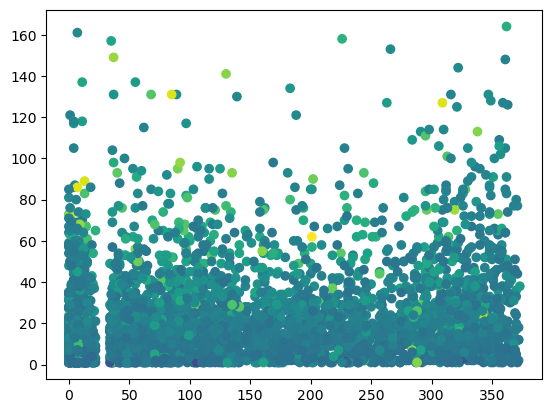

In [68]:
plt.scatter(frame['recency'], frame['frequency'], c=frame['monetary_value'], cmap='viridis')
plt.show()


### cluster analysis

In [53]:
cluster_0_data = frame[frame['cluster'] == 0]
cluster_1_data = frame[frame['cluster'] == 1]
cluster_2_data = frame[frame['cluster'] == 2]
cluster_3_data = frame[frame['cluster'] == 3]

In [52]:
cluster_0_data.value_counts()

recency  frequency  monetary_value  cluster
0        1          -27.50          0          1
91       20          388.30         0          1
         8           306.70         0          1
         10          162.30         0          1
         11          100.43         0          1
                                              ..
15       30          476.35         0          1
                     430.28         0          1
         29          403.61         0          1
         25          351.30         0          1
184      2           39.12          0          1
Length: 2279, dtype: int64

In [55]:
cluster_1_data.value_counts()

recency  frequency  monetary_value  cluster
0        8          1552.98         1          1
167      53         1069.47         1          1
172      44         718.96          1          1
         30         976.12          1          1
         29         797.65          1          1
                                              ..
76       10         1784.71         1          1
75       53         928.05          1          1
         30         889.24          1          1
71       68         1592.61         1          1
358      66         1060.25         1          1
Length: 373, dtype: int64

In [56]:
cluster_2_data.value_counts()

recency  frequency  monetary_value  cluster
0        57         313.93          2          1
298      53         769.29          2          1
305      65         376.97          2          1
         59         201.99          2          1
302      85         779.36          2          1
                                              ..
104      50         283.73          2          1
103      85         538.76          2          1
         67         177.59          2          1
102      51         296.88          2          1
371      77         469.48          2          1
Length: 307, dtype: int64

In [58]:
cluster_3_data.value_counts()

recency  frequency  monetary_value  cluster
160      30         489.10          3          1
316      6          300.85          3          1
         26         171.59          3          1
         21         313.86          3          1
         16         243.84          3          1
                                              ..
249      13         262.45          3          1
         12         375.10          3          1
         6          316.38          3          1
         5          107.64          3          1
373      38         848.55          3          1
Length: 1379, dtype: int64

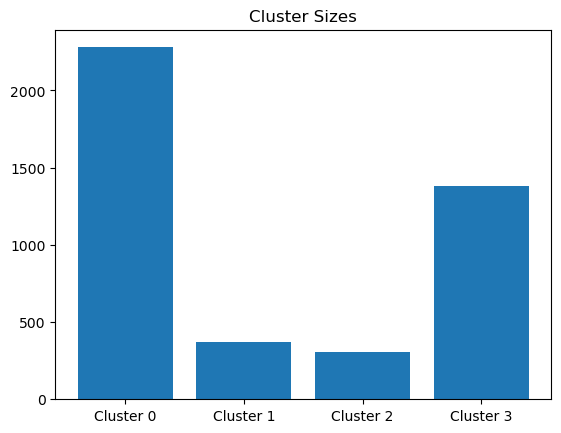

In [59]:
sizes = [len(cluster_0_data), len(cluster_1_data), len(cluster_2_data), len(cluster_3_data)]
plt.bar(['Cluster 0', 'Cluster 1', 'Cluster 2', 'Cluster 3'], sizes)
plt.title('Cluster Sizes')
plt.show()


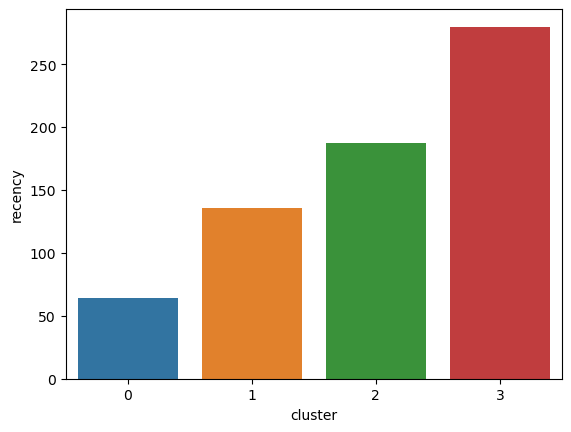

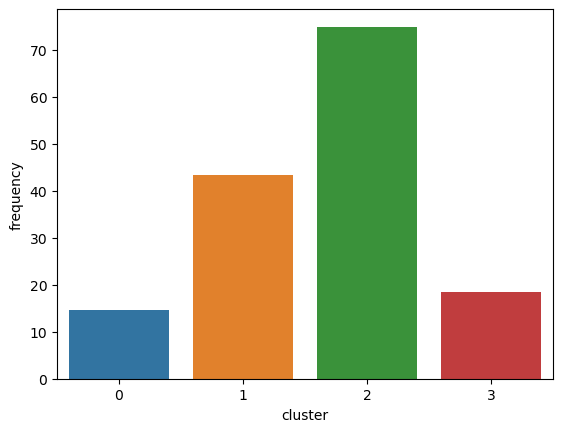

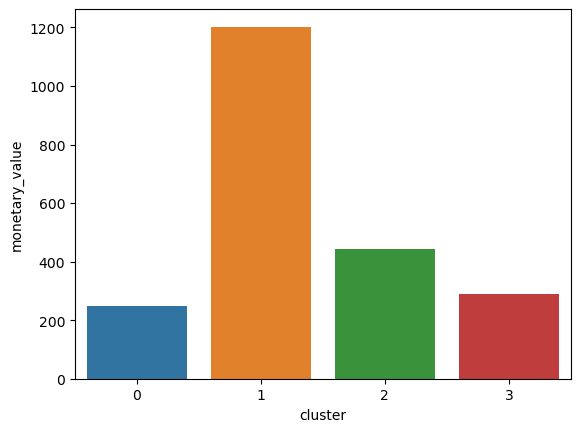

In [69]:
# calculate the mean values of features for each cluster and visualizes them using bar plots.

avg_df = frame.groupby(['cluster'], as_index=False).mean()
for i in my_list:
    sns.barplot(x='cluster',y=str(i),data=avg_df)
    plt.show()

In [71]:
# print the avg values for each feature for each cluster

cluster_profiles = frame.groupby('cluster').mean()
print(cluster_profiles)


            recency  frequency  monetary_value
cluster                                       
0         64.136463  14.597192      246.942326
1        135.329759  43.305630     1202.405767
2        187.488599  74.964169      442.708567
3        279.734590  18.467005      289.000625


### Cluster Interpretation
  ### Cluster 0
     -  Recency: 64 days (recent customers).
     -  Frequency: Moderate frequency of ~15 purchases.
     -  Monetary Value: Low average spend of ~247.
Insight: These are relatively new customers with moderate activity and low spending. They may be growing customers worth nurturing.

 ### Cluster 1

    - Recency: 135 days (not very recent).
    - Frequency: High frequency of ~43 purchases.
    -  Monetary Value: High average spend of ~1202.
Insight: These are highly engaged, valuable customers. They represent your top-tier or VIP customers. Retention efforts like loyalty programs or exclusive offers could keep them engaged.

 ### Cluster 2

    - Recency: 187 days (less recent).
    - Frequency: Very high frequency of ~75 purchases.
    - Monetary Value: Moderate average spend of ~443.
Insight: These are frequent buyers with moderate spending. They might be bulk purchasers or habitual buyers. Cross-sell or upsell strategies could increase their monetary value.

 ### Cluster 3

    - Recency: 280 days (least recent).
    - Frequency: Low frequency of ~18 purchases.
    - Monetary Value: Low average spend of ~289.
Insight: These are inactive or infrequent buyers with low spending. Consider reactivation campaigns such as discounts or personalized emails to re-engage them.

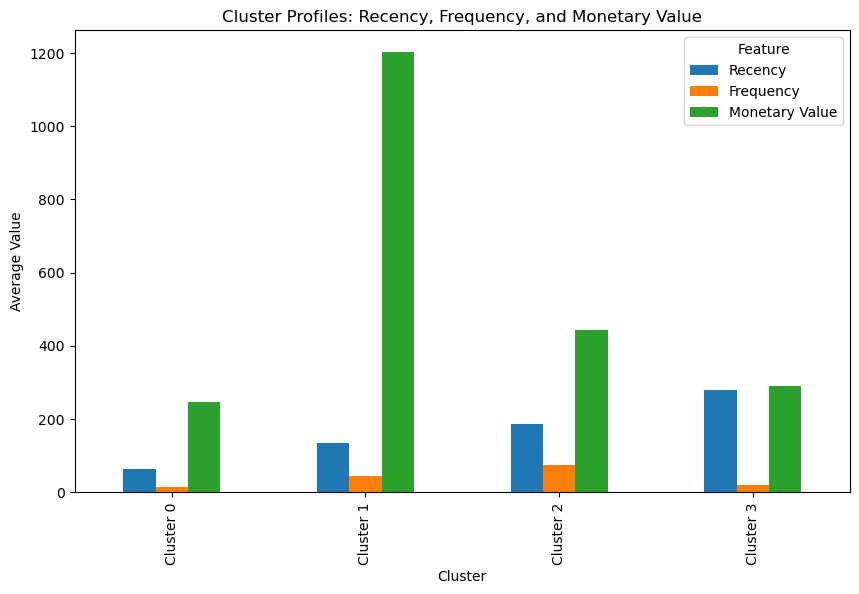

In [74]:
# plot all clusters on same plot

cluster_profiles = {
    'Cluster': ['Cluster 0', 'Cluster 1', 'Cluster 2', 'Cluster 3'],
    'Recency': [64.14, 135.33, 187.49, 279.73],
    'Frequency': [14.60, 43.31, 74.96, 18.47],
    'Monetary Value': [246.94, 1202.41, 442.71, 289.00]
}

df_profiles = pd.DataFrame(cluster_profiles).set_index('Cluster')
df_profiles.plot(kind='bar', figsize=(10, 6))
plt.title('Cluster Profiles: Recency, Frequency, and Monetary Value')
plt.ylabel('Average Value')
plt.xlabel('Cluster')
plt.legend(title='Feature')
plt.show()


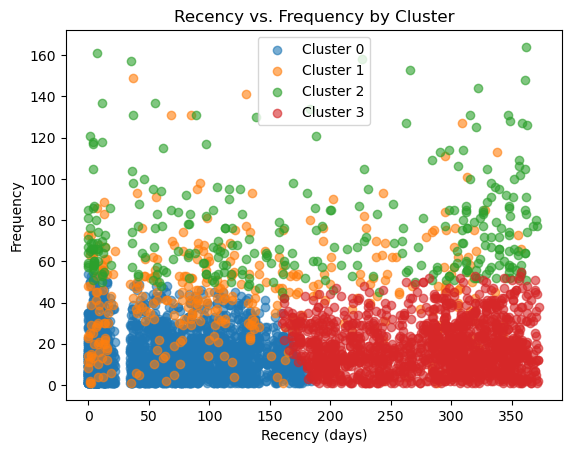

In [72]:
# plot recency vs. frequency for each of the clusters

plt.scatter(frame[frame['cluster'] == 0]['recency'], frame[frame['cluster'] == 0]['frequency'], label='Cluster 0', alpha=0.6)
plt.scatter(frame[frame['cluster'] == 1]['recency'], frame[frame['cluster'] == 1]['frequency'], label='Cluster 1', alpha=0.6)
plt.scatter(frame[frame['cluster'] == 2]['recency'], frame[frame['cluster'] == 2]['frequency'], label='Cluster 2', alpha=0.6)
plt.scatter(frame[frame['cluster'] == 3]['recency'], frame[frame['cluster'] == 3]['frequency'], label='Cluster 3', alpha=0.6)
plt.title('Recency vs. Frequency by Cluster')
plt.xlabel('Recency (days)')
plt.ylabel('Frequency')
plt.legend()
plt.show()


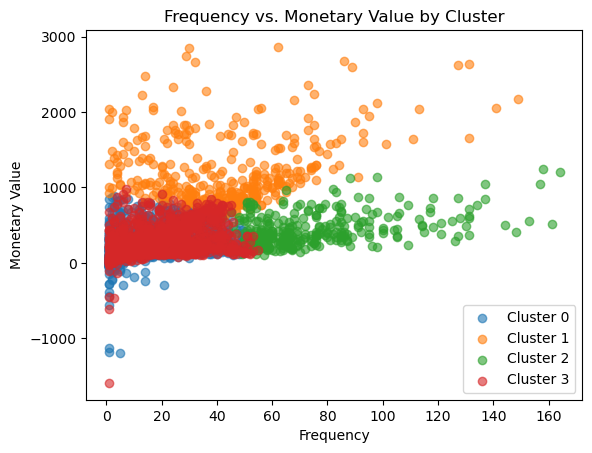

In [73]:
# plot relationship between frequency and monetary_value

plt.scatter(frame[frame['cluster'] == 0]['frequency'], frame[frame['cluster'] == 0]['monetary_value'], label='Cluster 0', alpha=0.6)
plt.scatter(frame[frame['cluster'] == 1]['frequency'], frame[frame['cluster'] == 1]['monetary_value'], label='Cluster 1', alpha=0.6)
plt.scatter(frame[frame['cluster'] == 2]['frequency'], frame[frame['cluster'] == 2]['monetary_value'], label='Cluster 2', alpha=0.6)
plt.scatter(frame[frame['cluster'] == 3]['frequency'], frame[frame['cluster'] == 3]['monetary_value'], label='Cluster 3', alpha=0.6)
plt.title('Frequency vs. Monetary Value by Cluster')
plt.xlabel('Frequency')
plt.ylabel('Monetary Value')
plt.legend()
plt.show()


### Conclusion:
This project provided actionable insights into customer behavior, enabling data-driven marketing strategies. By leveraging RFM-based clustering, this business can efficiently allocate resources, personalize customer experiences, and enhance profitability